In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [5]:
train_dataset, test_dataset = get_test_datasets('cardiotocography2', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('cardiotocography2', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('cardiotocography2')
num_tries = 15

dataset_shapes

([21], [3])

# Scalar network without hidden layers

Average elapsed k-fold validation time: 689.66317 sec
Last measures: [0.17474824115633963, 0.12414269670844078, 0.11771534979343415, 0.16371587738394738, 0.07611874639987945]


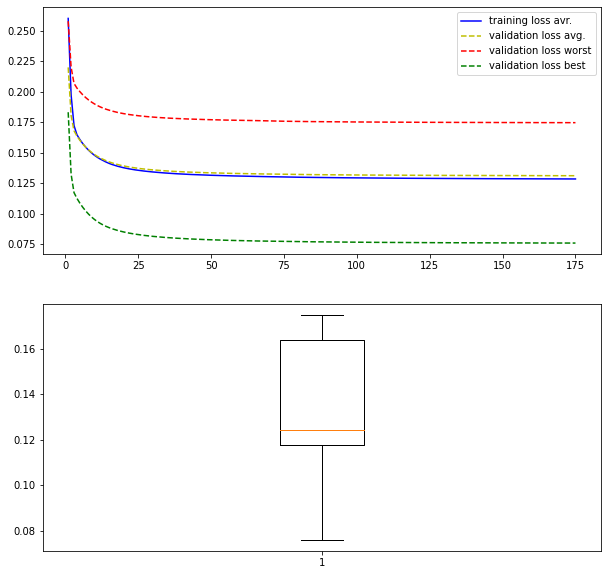

In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with one hidden layer

### S(2)

Average elapsed k-fold validation time: 871.33081 sec
Last measures: [0.23661281913518906, 0.17642282769083978, 0.1807916820049286, 0.16794625371694566, 0.26595218628644945]


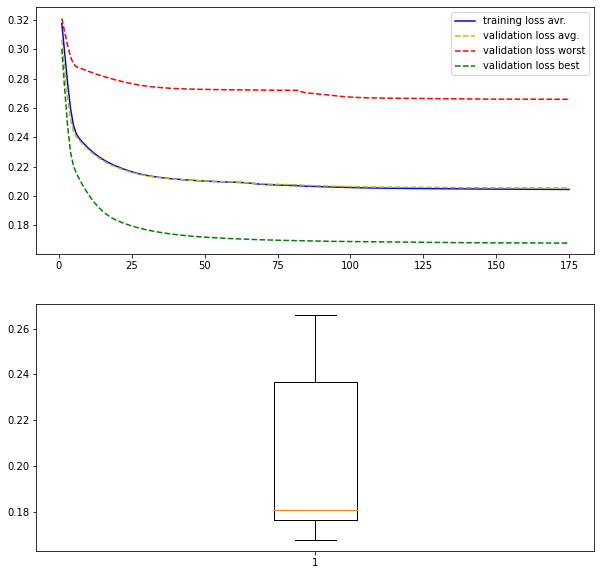

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(5)

Average elapsed k-fold validation time: 453.45821 sec
Last measures: [0.06535939127206802, 0.12111162692308426, 0.17012700587511062, 0.06879443302750587, 0.17699787467718125]


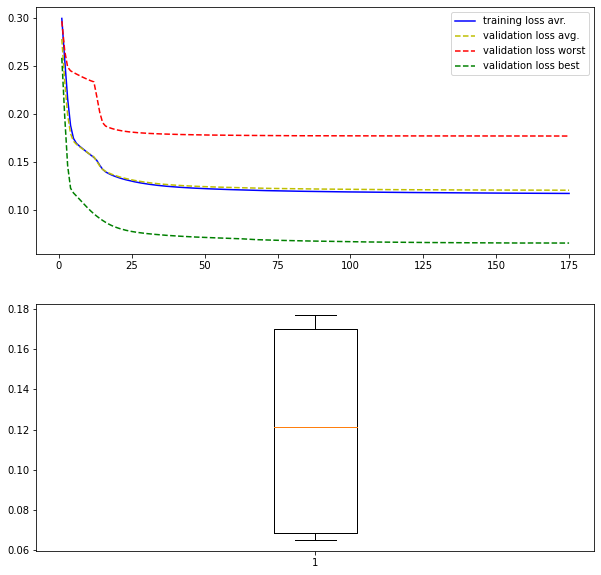

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(15)

Average elapsed k-fold validation time: 434.48524 sec
Last measures: [0.10843749791383743, 0.12778867781162262, 0.12167225182056426, 0.16332882568240165, 0.21002487540245057]


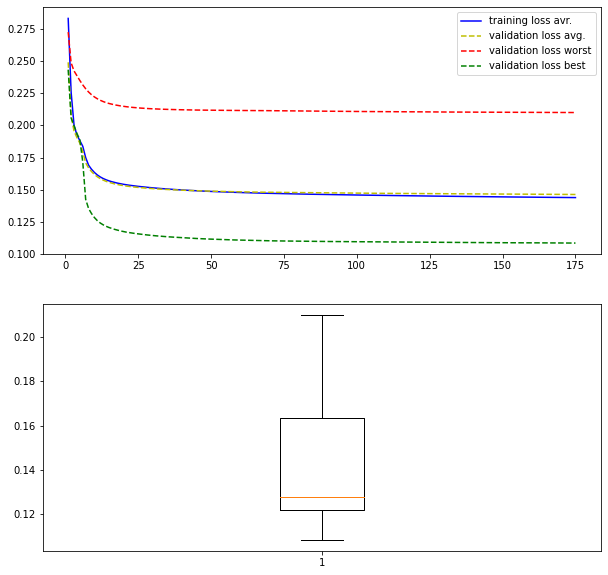

In [9]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[15], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(30)

Average elapsed k-fold validation time: 437.09120 sec
Last measures: [0.15954962447285653, 0.15416494011878967, 0.09920817017555236, 0.06264348924160004, 0.10799646675586701]


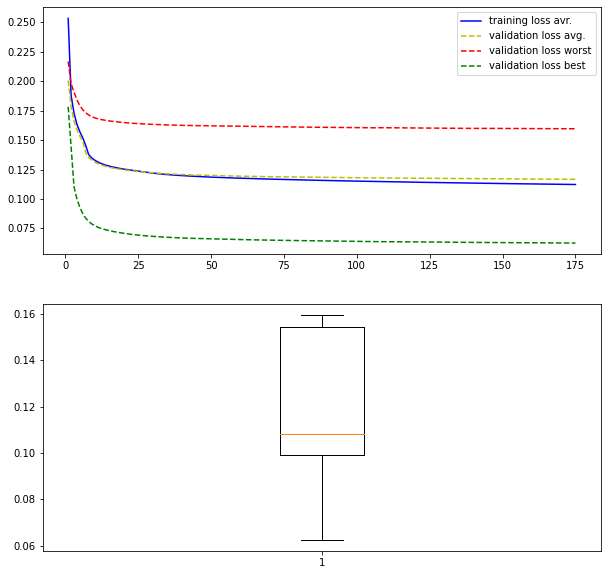

In [10]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[30], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with three hidden layers

### S(2,2,2)

Average elapsed k-fold validation time: 584.21115 sec
Last measures: [0.24684872925281526, 0.1884441539645195, 0.2519844263792038, 0.28414509147405625, 0.09817584455013276]


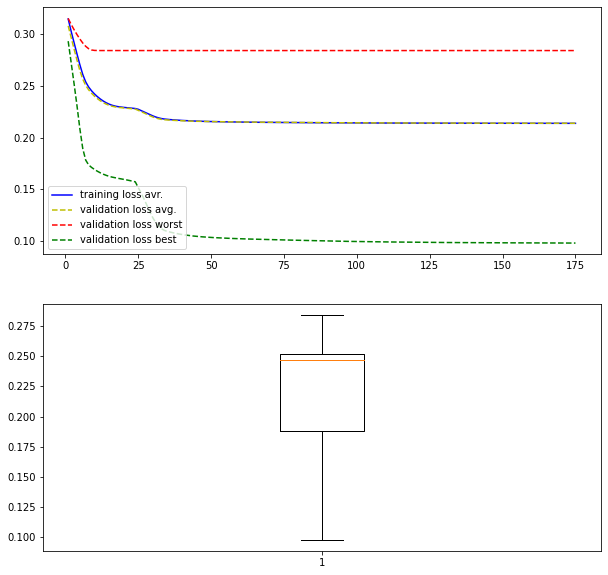

In [11]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(10,7,5)

Average elapsed k-fold validation time: 585.54190 sec
Last measures: [0.17691205590963363, 0.22096499800682068, 0.16920899525284766, 0.1181096836924553, 0.16976304948329926]


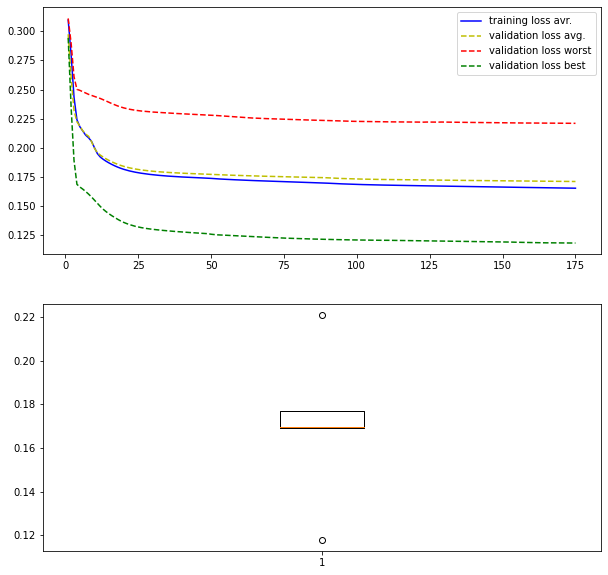

In [12]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), unique weights

### V1(2):U(2)

Average elapsed k-fold validation time: 608.43765 sec
Last measures: [0.16829155534505844, 0.22406120151281356, 0.17680990993976592, 0.15162785947322846, 0.28509900271892546]


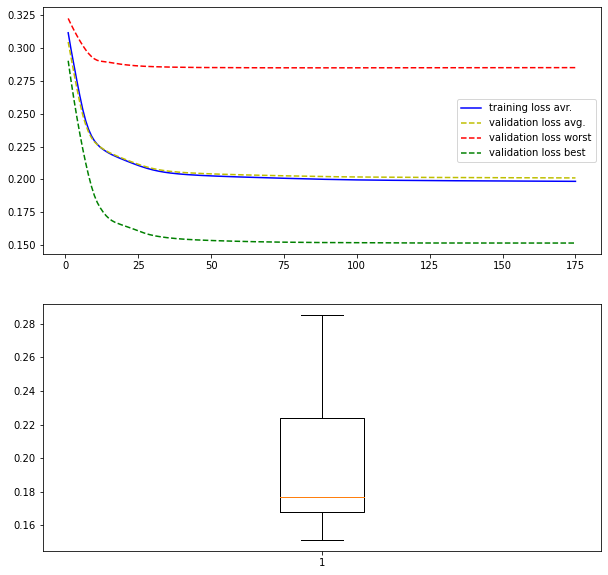

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):U(2)

Average elapsed k-fold validation time: 338.03510 sec
Last measures: [0.1824074313044548, 0.17483557537198066, 0.21820922791957856, 0.17288909405469893, 0.18179154843091966]


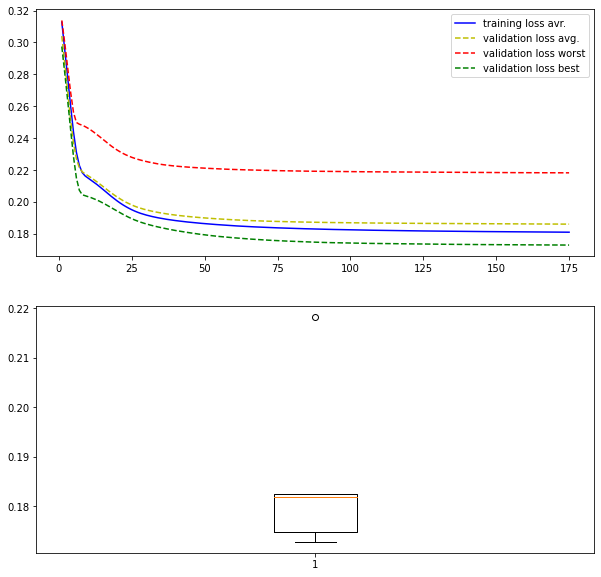

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), shared weights

### V1(2):S(2)

Average elapsed k-fold validation time: 235.55275 sec
Last measures: [0.10469411611557007, 0.12741267010569574, 0.1355729766190052, 0.1445058137178421, 0.2334165245294571]


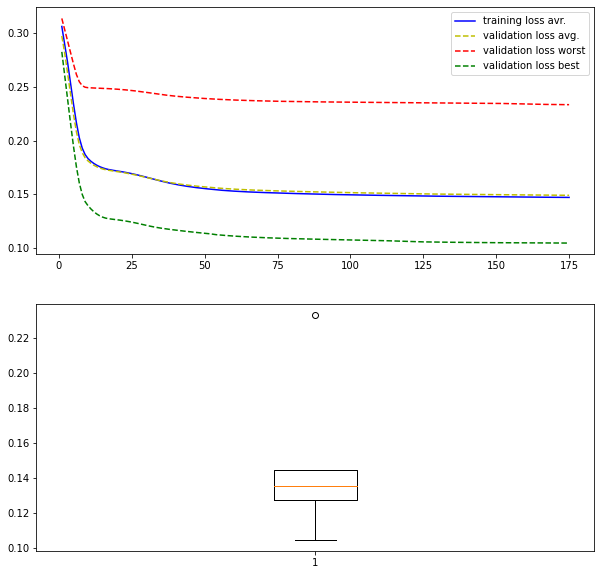

In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):S(2)

Average elapsed k-fold validation time: 235.93910 sec
Last measures: [0.1763571798801422, 0.06795649155974388, 0.16477863863110542, 0.11680409237742424, 0.08376655057072639]


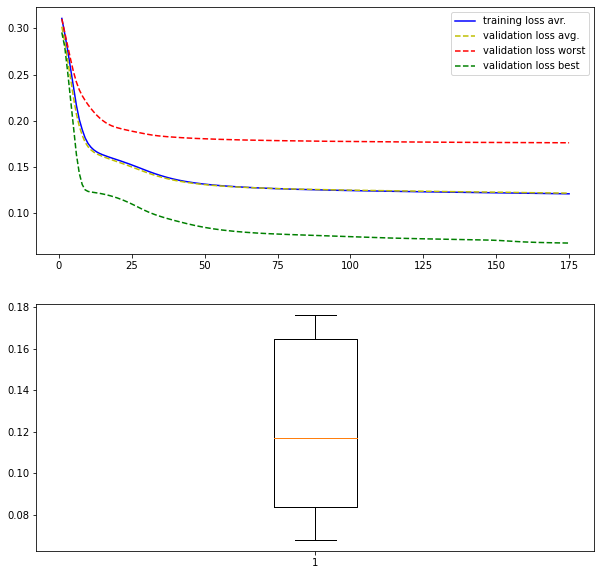

In [16]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=175, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")